### Backtest ML strategy

In [9]:
import sys
import os

# Get the path to the project root (adjust the number of '..' as needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to the system path
if project_root not in sys.path:
    sys.path.append(project_root)
print("Project root added to sys.path:", project_root)

Project root added to sys.path: /Users/admin/Desktop/Data Science/Trading-Bot


CV Accuracy: 0.4022250258057117


{'total_return': np.float64(-0.11059455669144735),
 'sharpe': np.float64(-0.20037145252634625),
 'win_rate': np.float64(0.004013914905004014),
 'max_drawdown': np.float64(-0.2460577269020591),
 'num_trades': np.int64(109)}

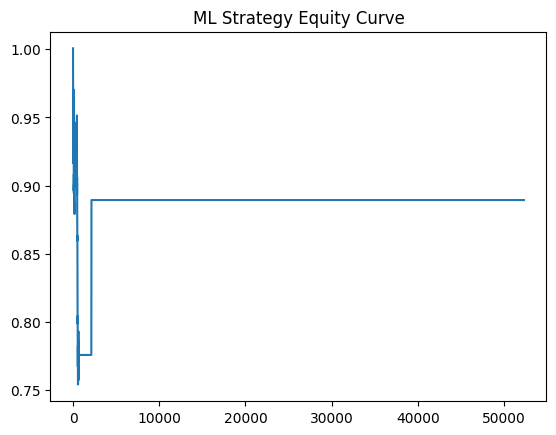

In [10]:
import pandas as pd
import numpy as np

from src.models.labels import add_future_return_label
from src.models.train_classifier import train_model
from src.backtest.ml_strategy import ml_strategy
from src.backtest.costs import apply_transaction_costs
from src.bot.risk import apply_risk_management
from src.backtest.metrics import performance_summary

df = pd.read_parquet("../data/processed/btc_1h.parquet")
df = add_future_return_label(df)

model = train_model(df)

df = ml_strategy(df, model)
df = apply_transaction_costs(df)
df = apply_risk_management(df)

df["strategy_return"] = df["net_return"]
df["equity"] = (1 + df["strategy_return"]).cumprod()

df["equity"].plot(title="ML Strategy Equity Curve")

stats = performance_summary(df)
stats


In [11]:
for k, v in stats.items():
    print(f"{k}: {round(v, 3)}")

total_return: -0.111
sharpe: -0.2
win_rate: 0.004
max_drawdown: -0.246
num_trades: 109
